# Exercise Six: Structured Data with Beautiful Soup and Pandas

For this example of the completed exercise, I implemented the bonus stage to iterate through multiple pages. Note that this is not the "final form" solution - ideally, we would first scrape all the names from the main page in the journalg, and use that to construct all of the URLs to pull a more robust dataset for analysis. Consider trying that expansion on your own. 

This example will:
- Grab the content from several articles in Digital Humanities Quarterly
- Demonstrate some ways of visualizing this type of data
- Save a visualization of an interesting element

## Stage One - Three: Import the libraries and Scrape Structured Data from Multiple Pages

For the bonus exercise, I've combined stage one with the original stage two and three. This allows for more easily scraping the structured data from each page, and gives us content to visualize and compare. Unlike the reviews, where each page contained multiple elements, this structure treats every page (article) as an entity. 

In [3]:
#import libraries and set up the scraping target
import requests
from bs4 import BeautifulSoup
import pandas as pd

urls = ['http://digitalhumanities.org/dhq/vol/15/2/000556/000556.html','http://digitalhumanities.org/dhq/vol/15/2/000558/000558.html','http://digitalhumanities.org/dhq/vol/15/2/000547/000547.html','http://digitalhumanities.org/dhq/vol/15/2/000548/000548.html','http://digitalhumanities.org/dhq/vol/15/2/000552/000552.html']

user_agent = {'User-agent': 'Mozilla/5.0'}

# define the empty dictionary based on properties usually included in an article

article_dict = {'title':[], 'first_author':[], 'issue':[], 'abstract':[]}

#scrape the structured content and add to the articles dictionary, looping through each url
for url in urls:
    response = requests.get(url, headers = user_agent)
    article = BeautifulSoup(response.text, 'html.parser')

    article_dict['title'].append(article.find('h1', class_='articleTitle lang en').text)
    article_dict['first_author'].append(article.find('div', class_='author').find('a').text)
    article_dict['issue'].append(article.find('div', class_='toolbar').find('a').text)
    article_dict['abstract'].append(article.find('div', id='abstract').find('p').text)
print(article_dict['title'])
print(article_dict['first_author'])
print(article_dict['issue'])
print(article_dict['abstract'])

['Why Digital Humanists Should Emphasize Situated Data\n               over Capta', 'Hands-On Reading: An Experiment in Slow Digital\n               Reading', 'Towards Hermeneutic Visualization in Digital\n                    Literary Studies', 'Imagining the Continuously Present Past:\n                    Visualizing William Faulknerâ\x80\x99s Narratives and Digital\n                        Yoknapatawpha', 'Going Digital: Teaching Crevecoeur in the\n                    Twenty-First Century']
['Matthew Lavin\n               ', 'Aditi Nafde\n               ', 'Rabea Kleymann', 'Johannes Burgers', 'Mary Mcaleer Balkun']
['2021 15.2', '2021 15.2', '2021 15.2', '2021 15.2', '2021 15.2']
["This essay looks back on Johanna Druckerâ\x80\x99s â\x80\x9cHumanities Approaches to Graphical Displayâ\x80\x9d (2011) ten years after its initial publication in Digital Humanities Quarterly, in particular Drucker's call to â\x80\x9creconceive all data as capta.â\x80\x9d Drucker makes several crucial poin

## Stage Four: Convert from Dictionary to DataFrame and Display

In [10]:

articles = pd.DataFrame(article_dict)
pd.set_option("display.max_colwidth", None)

articles

,title,first_author,issue,abstract
0,Why Digital Humanists Should Emphasize Situated Data\n over Capta,Matthew Lavin\n,2021 15.2,"This essay looks back on Johanna Druckerâs âHumanities Approaches to Graphical Displayâ (2011) ten years after its initial publication in Digital Humanities Quarterly, in particular Drucker's call to âreconceive all data as capta.â Drucker makes several crucial points about humanistic inquiry, but this essay argues against her embrace of capta as a replacement term for data in two ways: (1) furnishing a revised and expanded etymology for the terms data and (2) exploring the benefits of embracing concepts such as situated data rather than capta."
1,Hands-On Reading: An Experiment in Slow Digital\n Reading,Aditi Nafde\n,2021 15.2,"This paper offers a case study of the development of Hands-On Reading (https://hands-on-reading.atnu.ncl.ac.uk/login), a web app that explores the\n interconnections between digital reading and writing. The app was created as part of\n the AHRC-funded project âManuscripts after Print c.1450-1550:\n Producing and Reading Books during Technological Change,â which ran at\n Newcastle University between February 2019 and July 2020. It was initially designed\n to enable the project to ask two crucial questions: why does handwriting have an\n enduring relevance in a digital age; can a more hands-on approach to reading lead to\n a deeper engagement with a digital text? However, as this paper will show, the\n creation and testing of this app also raised a number of conceptual issues and\n technical challenges of broader relevance to the DH community, relating in particular\n to the question of whether reading and writing practices can be translated to the\n digital world.Â"
2,Towards Hermeneutic Visualization in Digital\n Literary Studies,Rabea Kleymann,2021 15.2,"In this article, we present our reflections on hermeneutic data visualizations\n for digital literary studies. Hermeneutic approaches in the digital humanities\n have been rather agnostic about the epistemological premises of hermeneutic\n theory. These can be summarized as (1) differentiation author/text, (2)\n hermeneutic circle and (3) dependency text/recipient. In this article, we\n present the concept of hermeneutic visualization as a means of bridging the gap\n between âclassicâ literary hermeneutics and the emerging\n practice of digital literary hermeneutics. Since data visualization is based on\n epistemological premises stemming from the natural or social sciences, it is not\n well-equipped to meet hermeneutic demands. In this article, we argue that the\n digital humanities can meet hermeneutic demands through a critical interface and\n visualization concept. We discuss four postulates that can be used as guidelines\n and help transform âmore traditionalâ data visualization into\n hermeneutic visualization, while respecting the epistemological foundations of\n hermeneutic theory. We demonstrate the usefulness of the postulates with an\n interactive prototype Stereoscope designed to\n support them.[1]"
3,Imagining the Continuously Present Past:\n Visualizing William Faulknerâs Narratives and Digital\n Yoknapatawpha,Johannes Burgers,2021 15.2,"Hosted out of the University of Virginia and funded by the National Endowment for\n the Humanities, Digital Yoknapatawpha is an\n international and collaborative project composed of William Faulkner scholars\n and technologists. Its goal is to create a comprehensive database of all the\n locations, characters, and events in Faulknerâs Yoknapatawpha fictions with the\n aim of visualizing the data through a series of âdeep\n atlasesâ and other displays. This paper traces the development\n cycle of a supplementary narrative structure analysis dashboard that allows\n users to explore the chronology, narrative status, and date range of all of the\n texts set in his mythic county. In doing so, it bridges some of the significant\n gaps between narratolog

## Stage Five: Plot some Aspect of the Data

In [25]:
from collections import Counter

word_bag = Counter()
articles['abstract'].str.lower().str.split().apply(word_bag.update)
print(word_bag)


Counter({'the': 40, 'of': 28, 'and': 23, 'to': 18, 'in': 17, 'digital': 16, 'a': 16, 'as': 11, 'this': 10, 'hermeneutic': 9, 'data': 8, 'we': 8, 'our': 8, 'for': 5, 'reading': 5, 'can': 5, 'with': 5, 'that': 4, 'between': 4, 'an': 4, 'visualization': 4, 'is': 4, 'essay': 3, 'on': 3, 'humanities': 3, 'all': 3, 'about': 3, 'two': 3, 'paper': 3, 'development': 3, 'app': 3, 'project': 3, 'print': 3, 'it': 3, 'be': 3, 'article,': 3, 'literary': 3, 'epistemological': 3, 'from': 3, 'narrative': 3, 'edition': 3, 'approaches': 2, 'after': 2, 'its': 2, 'particular': 2, 'several': 2, 'crucial': 2, 'but': 2, '(1)': 2, '(2)': 2, 'rather': 2, 'case': 2, 'hands-on': 2, 'was': 2, 'university': 2, 'designed': 2, 'have': 2, 'relevance': 2, 'also': 2, 'challenges': 2, 'present': 2, 'premises': 2, 'theory.': 2, 'not': 2, 'meet': 2, 'through': 2, 'critical': 2, 'discuss': 2, 'postulates': 2, 'into': 2, 'out': 2, 'yoknapatawpha': 2, 'some': 2, 'looks': 1, 'back': 1, 'johanna': 1, 'druckerâ\x80\x99s': 1, 'â\

<BarContainer object of 15 artists>

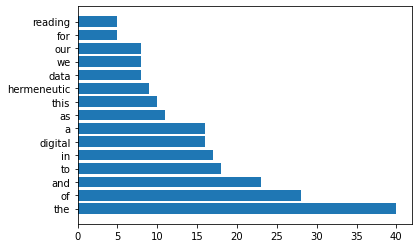

In [33]:
dh_words, dh_counts = zip(*word_bag.most_common(15))

import matplotlib.pyplot as plt
plt.barh(dh_words, dh_counts)

## Bonus Stage: Add On

Try:
- Iterating through multiple pages (all the pages of a database, for instance)
- Visualizing using another method from our discussion or readings
- Storing your data and / or visualization for external analysis